https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign
### Marketing Campaign 
##### - The company is preparing to launch its 6th marketing campaign to promote a new product line.
##### - A data scientist is assigned the task of building a classification model to predict the likelihood of customers purchasing the product in this campaign.

### Test Data : 
##### - The pilot campaign was conducted on 2,240 randomly selected customers, contacted via phone.
##### - Customers were recorded with labels: agreed to purchase (1) or declined (0).
### Objectives :
##### - Apply the prediction model to the remaining customer base to target those likely to purchase while ignoring those with no interest.
##### - Optimize marketing campaign costs.
##### - Analyze common characteristics of customers who are willing to buy.


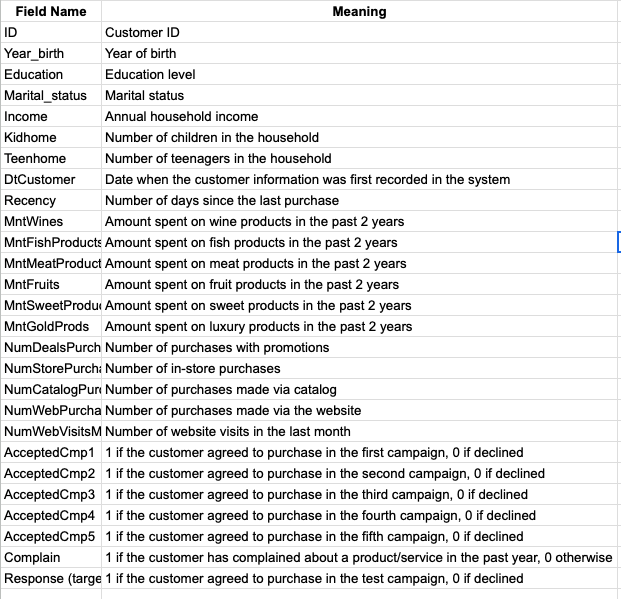

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



### EDA 

In [61]:
df = pd.read_csv("marketing_campaign.csv", delimiter = ';')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#### Perform exploratory data analysis to identify common demographic and behavioral characteristics of customers who agreed to purchase (Response = 1) and those who declined (Response = 0).

#### Firstly, marial status

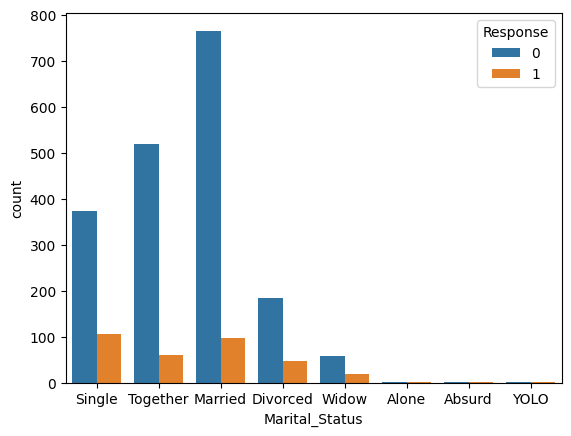

In [63]:

sns.countplot(df,x='Marital_Status',hue='Response')
plt.show()

#### Observation:
 For the group of single customers (Single, Divorced, Widow), the ratio of group 1 to group 0 is approximately 1/3. In the non-single group (Together, Married), this ratio is around 1/8 to 1/10.

### Education

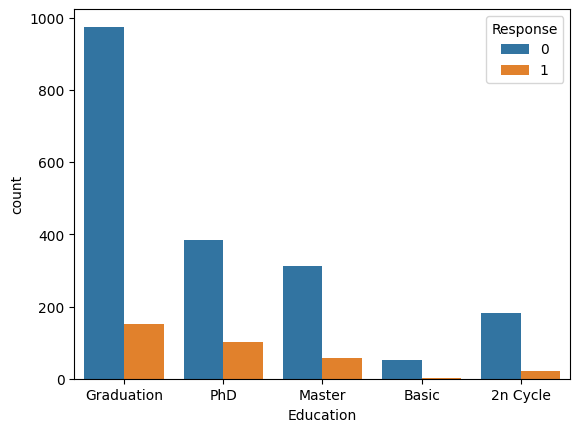

In [64]:

sns.countplot(df,x='Education',hue='Response')
plt.show()

#### It can be observed that the higher the educational level, the higher the ratio of Group 1 to Group 0. It is also evident that the agreement rate to purchase the product is higher among single customers and those with higher education

### Income

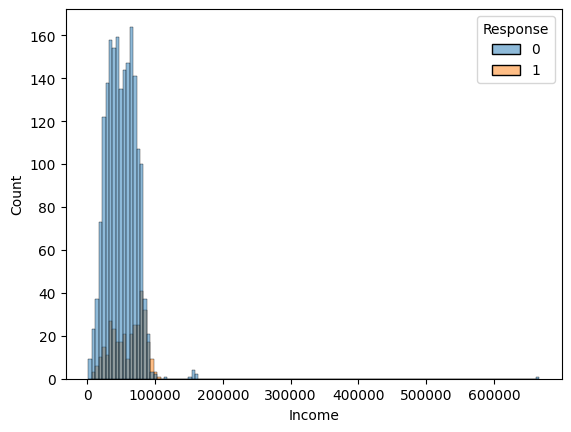

In [65]:
sns.histplot(data = df, x = 'Income', hue = "Response")
plt.show()

#### Most customers have an annual income below 100,000 USD. The income distribution of Group 0 is concentrated around 20-80k USD, while the distribution of Group 1 is concentrated around 80-100k USD. At the income level near 100k, the agreement rate to purchase is significantly higher compared to the refusal rate.

### Age

In [66]:
df['Current_Year'] = 2024
df['Age'] = df['Current_Year'] - df['Year_Birth']

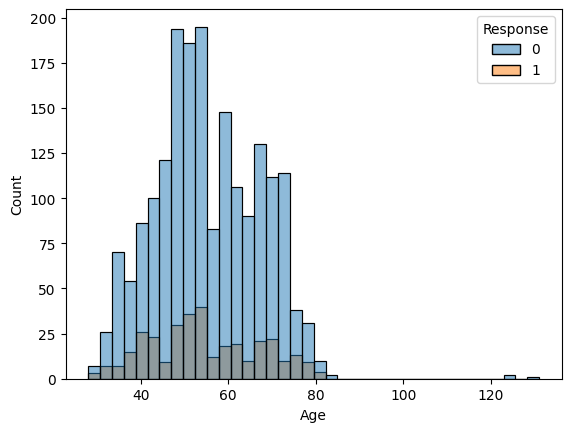

In [67]:
sns.histplot(data=df, x='Age',hue='Response')
plt.show()

#### There is a clear difference in the age distribution between the two groups. Although the center of both distributions is around 45-55 years old, the age distribution of Group 0 is much more concentrated compared to Group 1. This indicates that Group 0 has a significant concentration around the central age, while Group 1 has a more even spread

### Amount Spend

In [68]:
df["TotalAmountSpent"] = df["MntFishProducts"] + df["MntFruits"] + df["MntGoldProds"] + df["MntSweetProducts"] + df["MntMeatProducts"] + df["MntWines"]

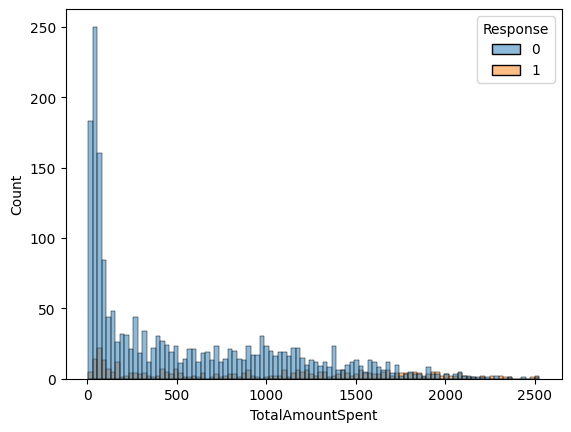

In [69]:
sns.histplot(data=df, x='TotalAmountSpent',hue='Response',bins=100)
plt.show()

#### The expenditure distribution of both groups peaks at 0-250 USD, then stretches from 250 to 2500 USD. 
    Conclusion: Customers who are likely to agree to purchase the product are concentrated in the single, highly educated, high-income group (80-100K USD), with ages ranging from 40 to 70.

#### Transform to One-Hot Encoding

In [70]:
cat_cols = ['Education', 'Marital_Status']

In [71]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Current_Year,Age,TotalAmountSpent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,2024,67,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,2024,70,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,2024,59,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,2024,40,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,2024,43,422


In [72]:
df_ohc = pd.get_dummies(df,columns= cat_cols)

In [73]:
df_ohc.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,1957,58138.0,0,0,2012-09-04,58,635,88,546,...,False,False,False,False,False,False,True,False,False,False
1,2174,1954,46344.0,1,1,2014-03-08,38,11,1,6,...,False,False,False,False,False,False,True,False,False,False
2,4141,1965,71613.0,0,0,2013-08-21,26,426,49,127,...,False,False,False,False,False,False,False,True,False,False
3,6182,1984,26646.0,1,0,2014-02-10,26,11,4,20,...,False,False,False,False,False,False,False,True,False,False
4,5324,1981,58293.0,1,0,2014-01-19,94,173,43,118,...,False,True,False,False,False,True,False,False,False,False


#### Create an additional field date_diff representing the number of days since the customer was first logged into the database. Intuition: The longer a customer has been with the system, the more loyal they may be, and the more likely they are to purchase the product

In [74]:
df_ohc['current_date']='2025-02-22'
df_ohc['current_date'] = pd.to_datetime(df_ohc['current_date'],format='%Y-%m-%d')

In [75]:
df_ohc['Dt_Customer'] = pd.to_datetime(df_ohc['Dt_Customer'],format='%Y-%m-%d')

In [76]:
df_ohc['date_diff'] = (df_ohc['current_date'] - df_ohc['Dt_Customer'])/ np.timedelta64(1, 'D')

In [77]:
df_ohc.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,current_date,date_diff
0,5524,1957,58138.0,0,0,2012-09-04,58,635,88,546,...,False,False,False,False,True,False,False,False,2025-02-22,4554.0
1,2174,1954,46344.0,1,1,2014-03-08,38,11,1,6,...,False,False,False,False,True,False,False,False,2025-02-22,4004.0
2,4141,1965,71613.0,0,0,2013-08-21,26,426,49,127,...,False,False,False,False,False,True,False,False,2025-02-22,4203.0
3,6182,1984,26646.0,1,0,2014-02-10,26,11,4,20,...,False,False,False,False,False,True,False,False,2025-02-22,4030.0
4,5324,1981,58293.0,1,0,2014-01-19,94,173,43,118,...,False,False,False,True,False,False,False,False,2025-02-22,4052.0


#### Fill the missing values for the Income field by using the mean value

In [78]:
df_ohc['Income'] = df_ohc['Income'].fillna(df_ohc['Income'].mean())

KNN measures the distance between data points to identify the closest 'neighbors.' If the variables are not on the same scale, variables with large values may disproportionately affect the results, while variables with smaller values may be overlooked. This can lead to an unfair and inaccurate model.

I will use a scaler to bring the numerical fields to the same scale. A commonly used scaler is the Standard Scaler.


In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
selected_cols = ['Income', 'Kidhome', 'Teenhome',
       'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain',
       'date_diff', 'Age', 'Education_2n Cycle',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Absurd', 'Marital_Status_Alone',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO','Response']

In [81]:
data = df_ohc[selected_cols]

In [82]:
scaler = StandardScaler()

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X = data.drop(columns=['Response'])
Y = data['Response']

In [85]:
# split 80/20
X_train,X_val,y_train,y_val = train_test_split(X, Y,test_size=0.2,random_state = 0)

In [86]:
X_train_scaled = scaler.fit_transform(X_train)

In [87]:
X_train_scaled

array([[ 0.50440537, -0.81139891,  0.89944429, ..., -0.59195816,
        -0.19245009, -0.02362937],
       [-0.13710877, -0.81139891, -0.94683769, ..., -0.59195816,
        -0.19245009, -0.02362937],
       [-0.61401396,  1.05513106, -0.94683769, ..., -0.59195816,
        -0.19245009, -0.02362937],
       ...,
       [-0.81444115,  1.05513106, -0.94683769, ..., -0.59195816,
        -0.19245009, -0.02362937],
       [ 0.72535544, -0.81139891,  0.89944429, ..., -0.59195816,
        -0.19245009, -0.02362937],
       [ 4.04599561, -0.81139891, -0.94683769, ...,  1.68930857,
        -0.19245009, -0.02362937]])

In [88]:
X_val_scaled = scaler.transform(X_val)

### Modeling

#### Build a KNN classification model to predict whether a given customer will agree or refuse to purchase a product in the new campaign. Find the optimal value for k and hyperparameters (distance function, weighting method)

In [89]:
from sklearn.neighbors import KNeighborsClassifier

In [90]:
# equal weights,Euclidean Distance
knn = KNeighborsClassifier(n_neighbors=3,metric='euclidean',weights='uniform')

In [91]:
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [92]:
knn.score(X_train_scaled,y_train), knn.score(X_val_scaled,y_val)

(0.9151785714285714, 0.8504464285714286)

The baseline KNN model with k = 3 achieved 91.6% accuracy on the training set and 86.6% accuracy on the validation set. The 5% difference indicates that the model is overfitting. To reduce overfitting, we need to decrease the complexity of the model, in other words, increase the value of k

#### Run the model with k ranging from 1 to 30 and monitor the results

In [93]:
acc = {'k':[], 'train_acc':[], 'val_acc':[]}
for k in range(1,30):
  knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean',weights='uniform')
  knn.fit(X_train_scaled,y_train)
  train_acc = knn.score(X_train_scaled,y_train)
  val_acc = knn.score(X_val_scaled,y_val)
  acc['k'].append(k)
  acc['train_acc'].append(train_acc)
  acc['val_acc'].append(val_acc)

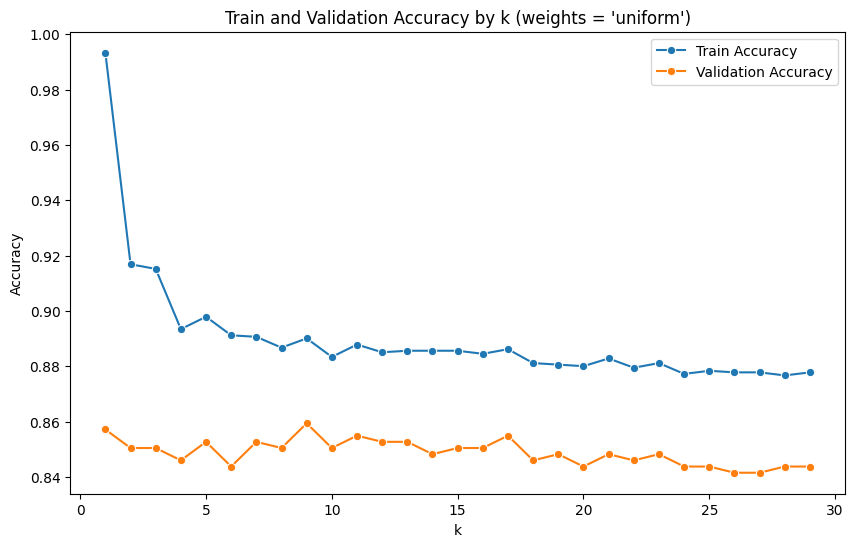

In [94]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.lineplot(x="k", y="train_acc", data=acc, marker='o', label="Train Accuracy")
sns.lineplot(x="k", y="val_acc", data=acc, marker='o', label="Validation Accuracy")
plt.title("Train and Validation Accuracy by k (weights = 'uniform')")
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Best value of K is 9

#### Perform a similar experiment with the weighting method based on distance (weights = 'distance').

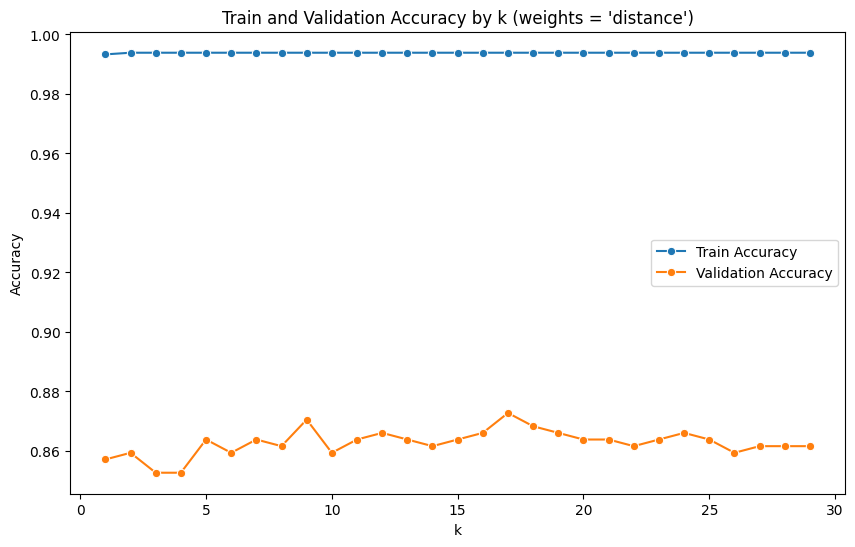

In [95]:
acc_distance = {'k':[], 'train_acc':[], 'val_acc':[]}
for k in range(1,30):
  knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean',weights='distance')
  knn.fit(X_train_scaled,y_train)
  train_acc = knn.score(X_train_scaled,y_train)
  val_acc = knn.score(X_val_scaled,y_val)
  acc_distance['k'].append(k)
  acc_distance['train_acc'].append(train_acc)
  acc_distance['val_acc'].append(val_acc)

plt.figure(figsize=(10, 6))
sns.lineplot(x="k", y="train_acc", data=acc_distance, marker='o', label="Train Accuracy")
sns.lineplot(x="k", y="val_acc", data=acc_distance, marker='o', label="Validation Accuracy")
plt.title("Train and Validation Accuracy by k (weights = 'distance')")
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Based on the train-validation accuracy chart, we observe that the model's accuracy on the validation set increases as k increases from 1 to 17, peaking at k = 17 with an accuracy of 87%. The accuracy on the training set remains constant at 99% regardless of the value of k. Therefore, even when the validation set reaches its peak, the gap between the two sets remains 8%, indicating a significant overfitting issue. As a result, the weighting method should not be used in this case.

#### What are the most important features for building the KNN model?
 we can calculate the importance of a feature by comparing the model's accuracy on the validation set before and after removing that feature

In [96]:

X_train_scaled_df = pd.DataFrame(X_train_scaled,columns = selected_cols[:30])
X_val_scaled_df = pd.DataFrame(X_val_scaled,columns = selected_cols[:30])

In [97]:
# First, I calculate the accuracy on the validation set with all features included
knn = KNeighborsClassifier(n_neighbors=6, metric='euclidean',weights='uniform')
knn.fit(X_train_scaled_df,y_train)
val_acc = knn.score(X_val_scaled_df,y_val)

In [98]:
X_train_scaled_df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'date_diff', 'Age',
       'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO'],
      dtype='object')

In [99]:
# For each feature, I calculate the accuracy of the KNN model on the validation set without that feature, and from there, we can determine the importance of that feature
feature_importance = {'Feature':[],'Importance':[]}
for col in X_train_scaled_df.columns:
  X_train_scaled_without_col = X_train_scaled_df.drop(columns=[col])
  X_val_scaled_without_col = X_val_scaled_df.drop(columns=[col])
  knn_without_col = KNeighborsClassifier(n_neighbors=6, metric='euclidean',weights='uniform')
  knn_without_col.fit(X_train_scaled_without_col,y_train)
  val_acc_without_col = knn_without_col.score(X_val_scaled_without_col,y_val)
  col_feature_importance = val_acc - val_acc_without_col
  feature_importance['Feature'].append(col)
  feature_importance['Importance'].append(col_feature_importance)


In [100]:
pd.DataFrame(feature_importance).sort_values(by=['Importance'],ascending=False)

,Feature,Importance
11,AcceptedCmp5,0.008929
12,AcceptedCmp1,0.006696
16,Age,0.006696
9,AcceptedCmp3,0.004464
0,Income,0.002232
5,NumWebPurchases,0.002232
13,AcceptedCmp2,0.002232
27,Marital_Status_Together,0.002232
20,Education_Master,0.002232
3,Recency,0.002232


The top most important features are the customer's behavior with the previous 5 campaigns, the customer's education level (whether they have a PhD or not), marital status (single or married), the number of purchases made through the website, and income. This aligns with the insights we discovered during the exploratory data analysis in Part 1.